# Functions

In [1]:
import QUANTAXIS as QA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime
from scipy.optimize import minimize


def plotyy(t,data1,data2,label1,label2):
    fig, ax1 = plt.subplots()
    plt.xticks(rotation=25)
    color = 'r'
    ax1.set_ylabel(label1, color=color)
    ax1.plot(t, data1, 'r-')
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()  
    color = 'b'
    ax2.set_ylabel(label2, color=color) 
    ax2.plot(t, data2, 'b-')
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()  
    plt.show()

def r2(Y,y):
    r=Y-y
    sse=np.dot(r.T,r).item()
    z=y-np.average(y)
    nvar=np.dot(z.T,z).item()
    return 1-sse/nvar

def value(f):
    v=max(-1,min(1,max(1-min(f)/f[0],0)*10+min(1-max(f)/f[0],0)*10))
#     if v<-0.5:
#         v=-1
#     elif v>0.5:
#         v=1
#     else:
#         v=0
    return v
    
def lr(x,y,la=None):
    if la is None:
        la=0
    A=np.dot(x.T,x)+la*np.identity(x.shape[1])
    b=np.dot(x.T,y)
    p=np.linalg.solve(A,b)
    return p

def nr(x,y,p0=None,la=None):
    if la is None:
        la=0
    def func(p):
        p=p.reshape(x.shape[1],1)
        Y=np.tanh(np.dot(x,p))
        J=(-np.dot(1-y.T,np.log(1-Y)).item()-np.dot(1+y.T,np.log(1+Y)).item())/2
        return J+(la/2)*np.dot(p.T,p).item()
    def jac(p):
        p=p.reshape(x.shape[1],1)
        Y=np.tanh(np.dot(x,p))        
        return np.squeeze(np.dot(x.T,Y-y)+la*p)
    def hess(p):
        p=p.reshape(x.shape[1],1)
        Y=np.tanh(np.dot(x,p))
        return np.dot(np.dot(x.T,np.diagflat(1-Y*Y)),x)+la*np.identity(x.shape[1])
    if p0 is None:
        p0=np.random.normal(size=(x.shape[1],1))/100
    result = minimize(func, p0, method='trust-exact',jac=jac,hess=hess)
    p=result.x
    return p.reshape(x.shape[1],1)


Bad key "text.kerning_factor" on line 4 in
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [5]:
str=datetime.now()
codes=QA.QA_fetch_stock_list().index.tolist()
code_list=[]
for code in codes:
    data=QA.QA_fetch_stock_day_adv(code,'2010-01-01','2021-01-01')
    if data is not None:
        filename='./data2/'+code+'.txt'
        np.savetxt(filename, np.asmatrix(data), fmt="%s")
        code_list.append(code)
filename='./data2/code_list.txt'
np.savetxt(filename, np.asarray(code_list), fmt="%s")
fin=datetime.now()
print(fin-str)

QA Error QA_fetch_stock_day_adv parameter code=000034 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=000039 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=000059 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=000096 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=000166 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=000540 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=000623 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=000703 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None


QA Error QA_fetch_stock_day_adv parameter code=002876 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002877 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002878 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002879 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002880 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002881 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002882 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=002883 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None


QA Error QA_fetch_stock_day_adv parameter code=003000 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=003001 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=003002 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=003003 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=003004 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=003005 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=003006 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=003007 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None


QA Error QA_fetch_stock_day_adv parameter code=300228 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300234 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300244 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300264 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300269 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300273 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300295 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None
QA Error QA_fetch_stock_day_adv parameter code=300308 , start=2010-01-01, end=2021-01-01 call QA_fetch_stock_day return None


In [114]:
print(x.shape,y.shape,p.shape)

Y=np.tanh(np.dot(x,p))

iters=1000
tic=datetime.now()
for i in range(iters):
    c=np.sum((-(1-y)*np.log(1-Y)-(1+y)*np.log(1+Y))/2)
toc=datetime.now()
print(toc-tic,c)


tic=datetime.now()
for i in range(iters):
    c=(-np.dot(1-y.T,np.log(1-Y)).item()-np.dot(1+y.T,np.log(1+Y)).item())/2
toc=datetime.now()
print(toc-tic,c)



(467, 121) (467, 1) (121, 1)
0:00:00.037900 -33.94193403329619
0:00:00.024932 -33.94193403329619


# Backtest

2019-01-30 Buy 14700 shares at price 6.78
 benchmark: 2019-01-31 Buy 15400 shares at price 6.47
 benchmark: 2019-03-05 Sell 15400 shares at price 7.2
2019-03-06 Sell 14700 shares at price 7.41
2019-04-03 Buy 16400 shares at price 6.64
 benchmark: 2019-05-20 Buy 18200 shares at price 6.1
 benchmark: 2019-06-10 Sell 18200 shares at price 6.71
 benchmark: 2019-07-09 Buy 19500 shares at price 6.23
2019-08-06 Sell 16400 shares at price 6.63
 benchmark: 2019-08-14 Sell 19500 shares at price 6.89
2019-10-23 Buy 18600 shares at price 5.84
 benchmark: 2019-11-14 Buy 24000 shares at price 5.59
 benchmark: 2019-12-03 Sell 24000 shares at price 6.1
2020-01-07 Sell 18600 shares at price 5.65
 benchmark: 2020-02-04 Buy 31200 shares at price 4.69
 benchmark: 2020-02-21 Sell 31200 shares at price 4.98
 benchmark: 2020-03-23 Buy 35900 shares at price 4.32
 benchmark: 2020-03-25 Sell 35900 shares at price 4.68
 benchmark: 2020-04-29 Buy 40800 shares at price 4.11
 benchmark: 2020-05-27 Sell 40800 shares

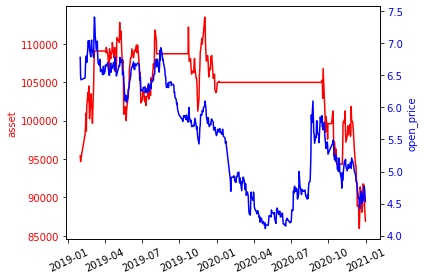

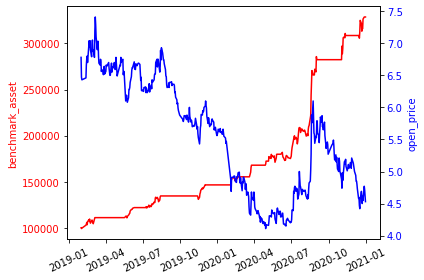

In [70]:
tic=datetime.now()
use_linear_model=0 # 1 for linear model and 0 for nonlinear model
code='600011'
data=QA.QA_fetch_stock_day_adv(code,'2017-01-01','2021-01-01')
L=len(data)
date=[]
open_price=[]
for i in range(L):
    date.append(data.date[i].date())
    open_price.append(data.open[i])

m=40
n=20
buy_threshold=-0.5
sell_threshold=0.5
la=0.01
   
index=[]
for i in range(L):
    index.append(value(data.open[i:min(i+n,L)]))
    
price_max=0
volume_max=0
amount_max=0
for i in range(L):
    if data.high[i]>price_max:
        price_max=data.high[i]
    if data.volume[i]>volume_max:
        volume_max=data.volume[i]
    if data.amount[i]>amount_max:
        amount_max=data.amount[i]

d=6*m # dimension
s=L-m # size
y=np.zeros((s,1))
x=np.zeros((s,d+1))
for i in range(s):
    y[i,0]=index[i+m]
    x[i,d]=1
    for j in range(m):
        x[i,6*j]=data.open[i+j]/price_max
        x[i,6*j+1]=data.close[i+j]/price_max
        x[i,6*j+2]=data.low[i+j]/price_max
        x[i,6*j+3]=data.high[i+j]/price_max
        x[i,6*j+4]=data.volume[i+j]/volume_max
        x[i,6*j+5]=data.amount[i+j]/amount_max
        
train_s=math.floor(s*0.5)
test_s=s-train_s
train_x=x[0:train_s,:]
train_y=y[0:train_s,:]
test_x=x[train_s:s,:]
test_y=y[train_s:s,:]

if use_linear_model:
    p=lr(train_x,train_y,la)
    train_Y=np.dot(train_x,p)
    test_Y=np.dot(test_x,p)
else:
    p=nr(train_x,train_y,la=la)
    train_Y=np.tanh(np.dot(train_x,p))
    test_Y=np.tanh(np.dot(test_x,p))
    
train_R2=r2(train_Y,train_y)
test_R2=r2(test_Y,test_y)

asset=np.zeros((test_s,1))
cash=np.zeros((test_s,1))
cash_init=100000
share=0
benchmark_asset=np.zeros((test_s,1))
benchmark_cash=np.zeros((test_s,1))
benchmark_share=0
dynamic_index=np.ones((test_s,1))

for i in range(test_s):
    if i>0:
        cash[i]=cash[i-1]
        benchmark_cash[i]=benchmark_cash[i-1]
    else:
        cash[i]=cash_init
        benchmark_cash[i]=cash_init
    today_s=train_s+i
    today_x=x[0:today_s,:]
    today_y=y[0:today_s,:]
    for j in range(today_s-n,today_s):
        today_y[j,0]=value(data.open[j+m:today_s+m])
    if use_linear_model:
        p=lr(today_x,today_y,la)
        today_index=np.dot(x[today_s,:],p)
    else:
        p=nr(today_x,today_y,p,la)
        today_index=np.tanh(np.dot(x[today_s,:],p))
    dynamic_index[i]=today_index
    average_index=np.average(dynamic_index[max(0,i-3):i+1])
    if average_index<buy_threshold and share==0:
        buy_price=data.open[today_s+m]
        share=math.floor(cash[i]/buy_price/100)*100
        amount=share*buy_price
        fee=max(share*0.0006,1)+max(amount*0.0003,5)
        cash[i]=cash[i]-amount-fee
        print(date[today_s+m],'Buy',share,'shares at price',buy_price)
    if average_index>sell_threshold and share>0:
        sell_price=data.open[today_s+m]
        amount=share*sell_price
        fee=max(share*0.0006,1)+max(amount*0.0003,5)+amount*0.001
        cash[i]=cash[i]+amount-fee
        print(date[today_s+m],'Sell',share,'shares at price',sell_price)
        share=0
    if y[today_s,0]<buy_threshold and benchmark_share==0:
        buy_price=data.open[today_s+m]
        benchmark_share=math.floor(benchmark_cash[i]/buy_price/100)*100
        amount=benchmark_share*buy_price
        fee=max(benchmark_share*0.0006,1)+max(amount*0.0003,5)
        benchmark_cash[i]=benchmark_cash[i]-amount-fee
        print(' benchmark:',date[today_s+m],'Buy',benchmark_share,'shares at price',buy_price)
    if y[today_s,0]>sell_threshold and benchmark_share>0:
        sell_price=data.open[today_s+m]
        amount=benchmark_share*sell_price
        fee=max(benchmark_share*0.0006,1)+max(amount*0.0003,5)+amount*0.001
        benchmark_cash[i]=benchmark_cash[i]+amount-fee
        print(' benchmark:',date[today_s+m],'Sell',benchmark_share,'shares at price',sell_price)
        benchmark_share=0
    today_close=data.close[today_s+m]
    asset[i]=cash[i]+share*today_close  
    benchmark_asset[i]=benchmark_cash[i]+benchmark_share*today_close 

    
price_change=data.close[-1]/data.open[train_s+m]-1
profit=asset[-1,0]/cash_init-1
benchmark_profit=benchmark_asset[-1,0]/cash_init-1
dynamic_R2=r2(dynamic_index,test_y)
toc=datetime.now()
print(benchmark_profit,profit,price_change,[train_R2,test_R2,dynamic_R2],toc-tic)

test_t=date[m+train_s:m+s]
plotyy(test_t,asset,open_price[train_s+m:L],'asset','open_price')
plotyy(test_t,benchmark_asset,open_price[train_s+m:L],'benchmark_asset','open_price')

In [62]:
r0=train_Y-train_y
z0=train_y-np.average(train_y)
r=dynamic_index-test_y
z=test_y-np.average(test_y)
print(np.dot(r0.T,r0),np.dot(z0.T,z0),np.dot(train_y.T,train_y),np.dot(r.T,r),np.dot(test_y.T,test_y),np.dot(z.T,z))
print(len(train_y),len(test_y))

[[80.39515381]] [[171.92291221]] [[172.]] [[239.79480479]] [[159.]] [[157.19914347]]
467 467


In [242]:
filename="data.txt"
np.savetxt(filename, np.asmatrix(data), fmt="%s")
np.savetxt("date.txt", date, fmt="%s")

In [2]:
def backtest(code,m=None,n=None,buy_threshold=None,sell_threshold=None,use_linear_model=None,la=None):
    if m is None:
        m=20
    if n is None:
        n=10
    if buy_threshold is None:
        buy_threshold=-0.5
    if sell_threshold is None:
        sell_threshold=0.5   
    if use_linear_model is None:
        use_linear_model=1
    if la is None:
        la=0
          
    data=QA.QA_fetch_stock_day_adv(code,'2018-01-01','2020-01-01')
    if data is None:
        return
    L=len(data)
    if L<7*m+1:
        return
    date=[]
    for i in range(L):
        date.append(data.date[i].date())     
    index=[]
    for i in range(L):
        index.append(value(data.open[i:min(i+n,L)]))

    price_max=0
    volume_max=0
    amount_max=0
    for i in range(L):
        if data.high[i]>price_max:
            price_max=data.high[i]
        if data.volume[i]>volume_max:
            volume_max=data.volume[i]
        if data.amount[i]>amount_max:
            amount_max=data.amount[i]

    d=6*m # dimension
    s=L-m # size
    y=np.zeros((s,1))
    x=np.zeros((s,d+1))
    for i in range(s):
        y[i,0]=index[i+m]
        x[i,d]=1
        for j in range(m):
            x[i,6*j]=data.open[i+j]/price_max
            x[i,6*j+1]=data.close[i+j]/price_max
            x[i,6*j+2]=data.low[i+j]/price_max
            x[i,6*j+3]=data.high[i+j]/price_max
            x[i,6*j+4]=data.volume[i+j]/volume_max
            x[i,6*j+5]=data.amount[i+j]/amount_max

    train_s=math.floor(s*0.5)
    test_s=s-train_s
    train_x=x[0:train_s,:]
    train_y=y[0:train_s,:]
    test_x=x[train_s:s,:]
    test_y=y[train_s:s,:]

    if use_linear_model:
        p=lr(train_x,train_y,la)
        train_Y=np.dot(train_x,p)
        test_Y=np.dot(test_x,p)
    else:
        p=nr(train_x,train_y,la=la)
        train_Y=np.tanh(np.dot(train_x,p))
        test_Y=np.tanh(np.dot(test_x,p))

    train_R2=r2(train_Y,train_y)
    test_R2=r2(test_Y,test_y)
        
    asset=np.zeros((test_s,1))
    cash=np.zeros((test_s,1))
    cash_init=100000
    share=0
    dynamic_index=np.ones((test_s,1))
    benchmark_asset=np.zeros((test_s,1))
    benchmark_cash=np.zeros((test_s,1))
    benchmark_share=0

    for i in range(test_s):
        if i>0:
            cash[i]=cash[i-1]
            benchmark_cash[i]=benchmark_cash[i-1]
        else:
            cash[i]=cash_init
            benchmark_cash[i]=cash_init
        today_s=train_s+i
        today_x=x[0:today_s,:]
        today_y=y[0:today_s,:]
        for j in range(today_s-n,today_s):
            today_y[j,0]=value(data.open[j+m:today_s+m])
        if use_linear_model:
            p=lr(today_x,today_y,la)
            today_index=np.dot(x[today_s,:],p)
        else:
            p=nr(today_x,today_y,p,la)
            today_index=np.tanh(np.dot(x[today_s,:],p))
        dynamic_index[i]=today_index
        average_index=np.average(dynamic_index[max(0,i-3):i+1])
        if average_index<buy_threshold and share==0:
            buy_price=data.open[today_s+m]
            share=math.floor(cash[i]/buy_price/100)*100
            amount=share*buy_price
            fee=max(share*0.0006,1)+max(amount*0.0003,5)
            cash[i]=cash[i]-amount-fee
        if average_index>sell_threshold and share>0:
            sell_price=data.open[today_s+m]
            amount=share*sell_price
            fee=max(share*0.0006,1)+max(amount*0.0003,5)+amount*0.001
            cash[i]=cash[i]+amount-fee
            share=0
        if y[today_s,0]<buy_threshold and benchmark_share==0:
            buy_price=data.open[today_s+m]
            benchmark_share=math.floor(benchmark_cash[i]/buy_price/100)*100
            amount=benchmark_share*buy_price
            fee=max(benchmark_share*0.0006,1)+max(amount*0.0003,5)
            benchmark_cash[i]=benchmark_cash[i]-amount-fee
        if y[today_s,0]>sell_threshold and benchmark_share>0:
            sell_price=data.open[today_s+m]
            amount=benchmark_share*sell_price
            fee=max(benchmark_share*0.0006,1)+max(amount*0.0003,5)+amount*0.001
            benchmark_cash[i]=benchmark_cash[i]+amount-fee
            benchmark_share=0
        today_close=data.close[today_s+m]
        asset[i]=cash[i]+share*today_close  
        benchmark_asset[i]=benchmark_cash[i]+benchmark_share*today_close 
        
    price_change=data.close[-1]/data.open[train_s+m]-1
    profit=asset[-1,0]/cash_init-1
    benchmark_profit=benchmark_asset[-1,0]/cash_init-1
    dynamic_R2=r2(dynamic_index,test_y)
    result={
        'profit':round(profit,3),
        'benchmark_profit':round(benchmark_profit,3),
        'price_change':round(price_change,3),
        'R2':[round(train_R2,3),round(test_R2,3),round(dynamic_R2,3)]
    }
    return result    

In [3]:
from joblib import Parallel, delayed
import multiprocessing
from functools import partial

num_cores = multiprocessing.cpu_count()
foo_ = partial(backtest,m=20,n=10,buy_threshold=-0.5,sell_threshold=0.5,use_linear_model=1,la=0.01)
codes=QA.QA_fetch_stock_list().index.tolist()
shift=codes.index('600000')
# num=len(codes)-shift
num=10
tic=datetime.now()
results = Parallel(n_jobs=num_cores)(delayed(foo_)(codes[i+shift]) for i in range(num))
toc=datetime.now()
print(toc-tic)

0:00:11.301738


In [6]:
profit=np.zeros((num,1))
benchmark_profit=np.zeros((num,1))
price_change=np.zeros((num,1))
i=0
items=[]
for result in results:
    if result is not None:
        item={
            'code':codes[i+shift],
            'benchmark_profit':result['benchmark_profit'],
            'profit':result['profit'],
            'price_change':result['price_change'],
            'R2':result['R2']
        }
        items.append(item)
        profit[i]=result['profit']
        benchmark_profit[i]=result['benchmark_profit']
        price_change[i]=result['price_change']
        print(codes[i+shift],result['benchmark_profit'],result['profit'],result['price_change'],result['R2'])
        i+=1

print(np.average(benchmark_profit),np.average(profit),np.average(price_change),np.average(profit-price_change))

600000 0.592 0.0 0.225 [0.412, -1.084, -0.507]
600004 3.009 -0.05 0.803 [0.482, -1.249, -0.526]
600006 2.383 -0.003 0.205 [0.444, -2.087, -0.826]
600007 1.034 0.217 0.302 [0.538, -3.308, -0.68]
600008 0.799 0.0 -0.071 [0.439, -0.242, -0.106]
600009 2.024 0.291 0.628 [0.393, -3.112, -1.011]
600010 0.864 0.0 -0.126 [0.468, -4.313, -0.529]
600011 0.487 -0.018 -0.192 [0.523, -3.482, -0.367]
600012 0.543 0.0 0.021 [0.511, -3.554, -0.47]
600015 0.247 -0.071 0.032 [0.456, -0.47, -0.428]
1.1982 0.036599999999999994 0.18270000000000003 -0.14609999999999998


In [5]:
import json
file = open('lr1000.json', 'w+')
json.dump(items, file)
file.close()

In [97]:
file = open('nr1000.json', 'r')
results=json.load(file)
file.close
len(results)

989

In [ ]:
2.745046 0.09727899999999999 0.072817 0.024462000000000005 0.49321

In [60]:
filename="data.txt"
np.savetxt(filename, np.asmatrix(data)[:,0:6], fmt="%s")
np.savetxt("date.txt", date, fmt="%s")

In [4]:
code='600157'
data=QA.QA_fetch_stock_day_adv(code,'2019-01-01','2021-02-05')